In [1]:
# Dica para construção do ambiente com as ferramentas necessárias para executar a biblioteca

#conda create -n cptec python=3.10

#conda activate cptec
#!conda install -c conda-forge xarray matplotlib pycurl cfgrib netcdf4 pynio xarray matplotlib pycurl cfgrib netcdf4 pynio dask
#conda install -c anaconda ipykernel
!pip install cptec-model

Defaulting to user installation because normal site-packages is not writeable


In [85]:
# Import para os modelos disponiveis
# CPTEC_BAM, CPTEC_WRF, CPTEC_ETA, CPTEC_GFS

import cptecmodel.CPTEC_WRF as WRF
import cptecmodel.CPTEC_ETA as ETA
import cptecmodel.CPTEC_BRAMS as BRAMS

In [11]:
# Durante a inicialização do construtor informações sobre os dados são exibidas
# Entre elas informações de variaveis, niveis e frequência disponiveis para consulta

wrf = WRF.model()


#### US National Weather Service - NCEP (WMC) (ams_07km) #####

Forecast data available for reading between 20250211 and 20250221.

Surface variables: t2m, u10m, v10m, slp, psfc, precip
                   terrain, sbcape, sbcin, pw.
Level variables:   t, u, v, rh, g, omega.

levels (hPa): 1000 975 950 925 900 875 850 825 800 775 750 700 650
              600 550 500 450 400 350 300 250 200 150 100 50.

Frequency: hourly frequency [0,1,2,...,22,23].



In [10]:
wrf.daterange

DatetimeIndex(['2025-02-11', '2025-02-12', '2025-02-13', '2025-02-14',
               '2025-02-15', '2025-02-16', '2025-02-17', '2025-02-18',
               '2025-02-19', '2025-02-20', '2025-02-21'],
              dtype='datetime64[ns]', freq='D')

In [15]:
# Para todos modelos estão disponiveis 16 variaveis em niveis atmosféricos (hPa) e superficie
# Exemplo requisitando 2 variaveis, em 2 niveis, para a condição inicial da simulação e 1 hora de simulação

# Data da IC
date = '2025021900'

# Variaveis 
vars = ['t2m', 'u10m', 'v10m']

# Steps = Numero de simulações futuras a partir da inicialização do modelo
steps = 24

ds = wrf.load(date=date, var=vars, level=levels, steps=steps)
ds

<xarray.Dataset> Size: 330MB
Dimensions:    (time: 25, latitude: 1081, longitude: 1019)
Coordinates:
  * time       (time) datetime64[ns] 200B 2025-02-19 ... 2025-02-20
  * latitude   (latitude) float64 9kB -57.9 -57.83 -57.76 ... 17.56 17.63 17.7
  * longitude  (longitude) float64 8kB 269.3 269.4 269.5 ... 340.4 340.5 340.6
Data variables:
    t2m        (time, latitude, longitude) float32 110MB 4.585 4.585 ... 19.3
    u10m       (time, latitude, longitude) float32 110MB 13.82 13.83 ... -3.954
    v10m       (time, latitude, longitude) float32 110MB 9.904 9.944 ... -7.701
Attributes:
    center:   National Institute for Space Research - INPE
    model:    The Weather Research and Forecasting (ams_07km)

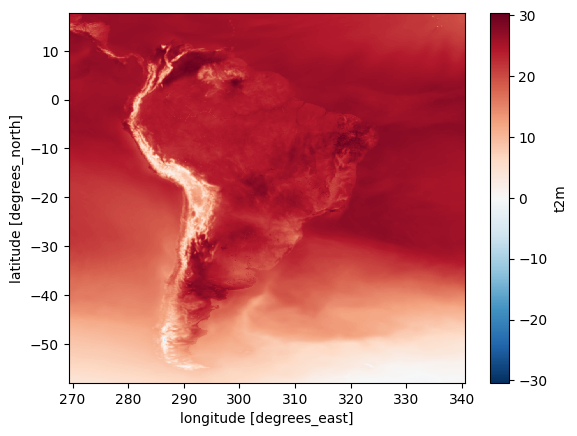

In [18]:
ds.t2m.mean(axis=0).plot()

In [24]:
import numpy as np 
mag = np.sqrt(ds.u10m**2+ ds.v10m**2)
mag

<xarray.DataArray (time: 25, latitude: 1081, longitude: 1019)> Size: 110MB
array([[[17.004227 , 17.035673 , 17.075274 , ..., 15.037744 ,
         15.089836 , 15.138139 ],
        [17.006536 , 17.051916 , 17.097345 , ..., 15.203221 ,
         15.228632 , 15.24995  ],
        [17.03444  , 17.079828 , 17.133377 , ..., 15.352426 ,
         15.374482 , 15.394428 ],
        ...,
        [ 1.4073051,  1.8392949,  2.3405428, ..., 10.400012 ,
         10.4099455, 10.387057 ],
        [ 1.5455322,  2.0604527,  2.6149025, ..., 10.506251 ,
         10.493242 , 10.460933 ],
        [ 1.7508441,  2.3017461,  2.8878486, ..., 10.579111 ,
         10.562908 , 10.507461 ]],

       [[17.537642 , 17.531618 , 17.539465 , ..., 15.316683 ,
         15.375832 , 15.425058 ],
        [17.350323 , 17.313862 , 17.319006 , ..., 15.186508 ,
         15.223314 , 15.288266 ],
        [17.41858  , 17.487722 , 17.56812  , ..., 15.451152 ,
         15.416429 , 15.390388 ],
...
        [ 1.0693033,  1.9310305,  3.0632753, ...,  7.9771605,
          8.194928 ,  8.424475 ],
        [ 1.0555593,  1.6732864,  2.8069959, ...,  8.114432 ,
          8.3440695,  8.514236 ],
        [ 0.976867 ,  1.4190046,  2.5694766, ...,  8.238532 ,
          8.446967 ,  8.576761 ]],

       [[11.001716 , 10.979257 , 10.957747 , ..., 10.435012 ,
         10.454933 , 10.482554 ],
        [10.868394 , 10.813326 , 10.757711 , ..., 10.169727 ,
         10.224439 , 10.289085 ],
        [10.804772 , 10.797283 , 10.7794895, ..., 10.002223 ,
         10.0575695, 10.110425 ],
        ...,
        [ 0.7346083,  1.3845847,  2.3076804, ...,  8.05638  ,
          8.284223 ,  8.571966 ],
        [ 0.8841964,  1.4593272,  2.3543684, ...,  8.231221 ,
          8.482169 ,  8.65341  ],
        [ 1.014342 ,  1.4255236,  2.4589586, ...,  8.371251 ,
          8.58676  ,  8.657066 ]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 200B 2025-02-19 ... 2025-02-20
  * latitude   (latitude) float64 9kB -57.9 -57.83 -57.76 ... 17.56 17.63 17.7
  * longitude  (longitude) float64 8kB 269.3 269.4 269.5 ... 340.4 340.5 340.6

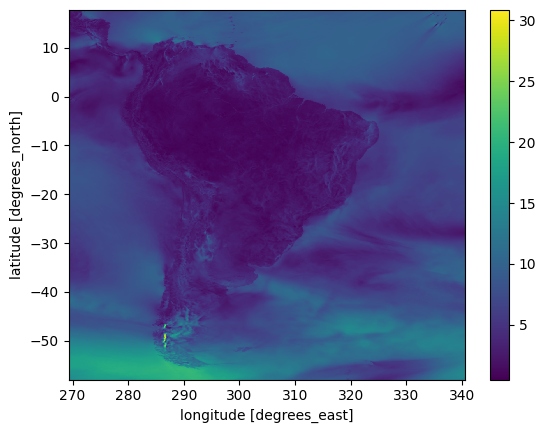

In [28]:
mag.mean(axis=0).plot()

In [30]:
# Exemplo selecionando uma area especifica

# Data da IC
date = '2025022000'

# Variaveis 
vars = ['terrain']

# Area selecionada altere reduce para true e altere os parametros de lat e lon
wrf.dict['area']['reduce'] = True
wrf.dict['area']['minlat'] = -35
wrf.dict['area']['maxlat'] = 0
wrf.dict['area']['minlon'] = 290
wrf.dict['area']['maxlon'] = 320

dsreg = wrf.load(date=date, var=vars, steps=1)

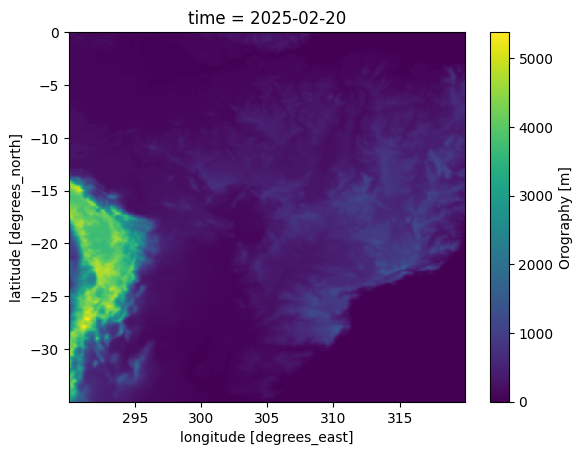

In [33]:
dsreg.terrain[0].plot()

In [40]:
# Para salvar netcdf com o resultado da requisição
ds.to_netcdf('wrf_regional.nc')

---
# Eta Model

In [41]:
eta = ETA.model()


#### Regional (ams_08km) #####

Forecast data available for reading between 20250211 and 20250221.

Surface variables: t2m, u10m, v10m, slp, psfc, precip
                   terrain, sbcape, sbcin, pw.
Level variables:   t, u, v, rh, g, omega.

levels (hPa): 1020 1000 950 925 900 850 800 750 700 650 600 
                 550 500 450 400 350 300 250 200 150 100 50.

Frequency: hourly frequency [0,1,2,...,22,23].



In [54]:
# Para todos modelos estão disponiveis 16 variaveis em niveis atmosféricos (hPa) e superficie
# Exemplo requisitando 2 variaveis, em 2 niveis, para a condição inicial da simulação e 1 hora de simulação

# Data da IC
date = '2025021900'

# Variaveis 
vars = ['t2m']

# Steps = Numero de simulações futuras a partir da inicialização do modelo
steps = 72

ds = eta.load(date=date, var=vars, level=levels, steps=steps)

eta.daterange

DatetimeIndex(['2025-02-11', '2025-02-12', '2025-02-13', '2025-02-14',
               '2025-02-15', '2025-02-16', '2025-02-17', '2025-02-18',
               '2025-02-19', '2025-02-20', '2025-02-21'],
              dtype='datetime64[ns]', freq='D')

In [55]:
ds72h = ds.sel(time='2025-02-22T00:00:00')

ds72h

<xarray.Dataset> Size: 3MB
Dimensions:    (latitude: 931, longitude: 875)
Coordinates:
    time       datetime64[ns] 8B 2025-02-22
  * latitude   (latitude) float64 7kB -55.0 -54.92 -54.84 ... 19.24 19.32 19.4
  * longitude  (longitude) float64 7kB 270.0 270.1 270.2 ... 339.8 339.8 339.9
Data variables:
    t2m        (latitude, longitude) float32 3MB 4.977 4.977 ... 18.37 18.13
Attributes:
    center:   National Institute for Space Research - INPE
    model:    Eta Regional (ams_08km)

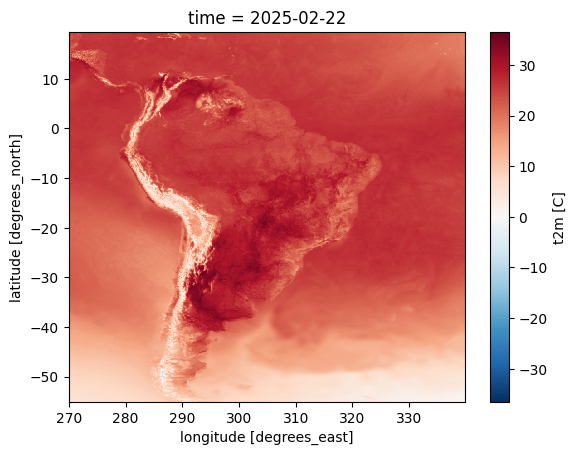

In [56]:
ds72h.t2m.plot()

---
# BRAMS Model

In [89]:
brams = BRAMS.model()


#### Brazilian developments on the Regional Atmospheric Modeling System (ams_08km) #####

Forecast data available for reading between 20250211 and 20250221.

Surface variables: t2m, u10m, v10m, slp, psfc, precip
                   terrain, sbcape, sbcin, pw.
Level variables:   t, u, v, rh, g, omega.

levels (hPa): 1000  925  850  775  700  500  400  300  250
              200 150  100   70   50   30   20   10    3.

Frequency: every 6 hours [0, 6, 12, 18,...,168].



In [70]:
brams.ftppath

'/modelos/tempo/BRAMS/ams_08km/brutos'

In [69]:
brams.dict

{'model': {'name': 'BRAMS',
  'parameter': 'ams_08km',
  'long_name': 'Brazilian developments on the Regional Atmospheric Modeling System'},
 'variables': {'t': 'TMP',
  'u': 'UGRD',
  'v': 'VGRD',
  'rh': 'RH',
  'g': 'HGT',
  'omega': 'VVEL',
  'u10m': 'UGRD',
  'v10m': 'VGRD',
  't2m': 'TMP',
  'slp': 'PRMSL',
  'psfc': 'PRMSLMetar',
  'terrain': 'HGT',
  'sbcape': 'CAPE',
  'sbcin': 'CIN',
  'pw': 'PWAT',
  'precip': 'APCP'},
 'levels': {'t': 'LVL',
  'u': 'LVL',
  'v': 'LVL',
  'rh': 'LVL',
  'g': 'LVL',
  'omega': 'LVL',
  'u10m': 'SFC',
  'v10m': 'SFC',
  't2m': 'SFC',
  'slp': 'SFC',
  'psfc': 'SFC',
  'terrain': 'SFC',
  'sbcape': 'SFC',
  'sbcin': 'SFC',
  'pw': 'SFC',
  'precip': 'SFC'},
 'area': {'minlat': -45,
  'maxlat': 10,
  'minlon': 277,
  'maxlon': 332,
  'dx': 20000,
  'reduce': False},
 'transform': {'precip': '/4',
  't': '-273.15',
  'rh': '*100',
  'omega': '*10',
  't2m': '-273.15'},
 'file': {'name': 'BRAMS_ams_08km_{}_{}.grib2', 'format': 'grib2'},
 'server':

In [74]:
brams.dict['variables']

{'t': 'TMP',
 'u': 'UGRD',
 'v': 'VGRD',
 'rh': 'RH',
 'g': 'HGT',
 'omega': 'VVEL',
 'u10m': 'UGRD',
 'v10m': 'VGRD',
 't2m': 'TMP',
 'slp': 'PRMSL',
 'psfc': 'PRMSLMetar',
 'terrain': 'HGT',
 'sbcape': 'CAPE',
 'sbcin': 'CIN',
 'pw': 'PWAT',
 'precip': 'APCP'}

In [93]:
brams.dict['variables']['precip']

dsprec = brams.load(date='2025022000', steps=72)

dsprec

unrecognized engine pynio must be one of your download engines: ['netcdf4', 'scipy', 'cfgrib', 'store']To install additional dependencies, see:
https://docs.xarray.dev/en/stable/user-guide/io.html 
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html
Unexpected err=ValueError("unrecognized engine pynio must be one of your download engines: ['netcdf4', 'scipy', 'cfgrib', 'store']To install additional dependencies, see:\nhttps://docs.xarray.dev/en/stable/user-guide/io.html \nhttps://docs.xarray.dev/en/stable/getting-started-guide/installing.html"), type(err)=<class 'ValueError'>


AttributeError: 'model' object has no attribute 'file'